In [1]:
import pandas as pd

"""
Our own dataset
"""
autobahn_data = pd.read_csv("Data/Autobahn/throughput.csv")

"""
Arctic data from the paper:
C. Beckman, J. Garcia, H. Mikkelsen, and P. Persson, 
“Starlink and Cellular Connectivity under Mobility: Drive Testing Across the Arctic Circle,” 
in Proceedings of the Wireless Telecommunications Symposium (WTS), 2024.
"""
arc_data = pd.read_csv("../arctic_data/Arctic_Slink.csv")
arc_data["velocity_kmh"] = arc_data["sl_veloc__value"] * 3.6
#arc_data["velocity_kmh"].max()
arc_data.dropna(inplace=True)
print("arctic:", arc_data.shape)

"""
US downlink data from the paper:
B. Hu, X. Zhang, Q. Zhang, N. Varyani, Z. M. Mao, F. Qian, and Z.-L. Zhang, 
“LEO Satellite vs. Cellular Networks: Exploring the Potential for Synergistic Integration,” 
in Proceedings of the 19th International Conference on emerging Networking EXperiments and Technologies (CoNEXT), 2023, pp. 45–51.
"""
conext_udp_data_dl = pd.read_csv("../CoNEXT_Data/3-Thrpt-Comp/UDP/Downlink/mob_all.csv")
conext_udp_data_dl["speed_kmh"] = conext_udp_data_dl["speed"] * 1.609344
conext_udp_data_dl = conext_udp_data_dl[conext_udp_data_dl["speed"] > 0]
conext_udp_data_dl.dropna(inplace=True)
print("conext downlink:", conext_udp_data_dl.shape)

"""
US uplink data from the paper:
B. Hu, X. Zhang, Q. Zhang, N. Varyani, Z. M. Mao, F. Qian, and Z.-L. Zhang, 
“LEO Satellite vs. Cellular Networks: Exploring the Potential for Synergistic Integration,” 
in Proceedings of the 19th International Conference on emerging Networking EXperiments and Technologies (CoNEXT), 2023, pp. 45–51.
"""
conext_udp_data_ul = pd.read_csv("../CoNEXT_Data/3-Thrpt-Comp/UDP/Uplink/mob_all_area.csv")
conext_udp_data_ul["speed_kmh"] = conext_udp_data_ul["speed"] * 1.609344
conext_udp_data_ul = conext_udp_data_ul[conext_udp_data_ul["speed"] > 0]
conext_udp_data_ul.dropna(inplace=True)
print("conext uplink:", conext_udp_data_ul.shape)

"""
GER-City data from the paper:
D. Laniewski, E. Lanfer, S. Beginn, J. Dunker, M. Dückers, and N. Aschenbruck, 
“Starlink on the Road: A First Look at Mobile Starlink Performance in Central Europe,” 
in Proceedings of the 8th Network Traffic Measurement and Analysis Conference (TMA), 2024.
"""
SotR_iperf_data = pd.read_csv("../Starlink-on-the-Road/data/iperf.csv")
SotR_iperf_data = SotR_iperf_data[SotR_iperf_data["average_speed"] > 0]
SotR_iperf_data["download"] = SotR_iperf_data["download"] / 1e6
SotR_iperf_data["upload"] = SotR_iperf_data["upload"] / 1e6
SotR_iperf_data.dropna(subset=["download", "upload"], inplace=True)
SotR_iperf_data = SotR_iperf_data[SotR_iperf_data["priority"] == 0]
print("SotR iperf:", SotR_iperf_data.shape)

# SotR_ping_data = pd.read_csv("../Starlink-on-the-Road/data/ping.csv")
# SotR_ping_data = SotR_ping_data[SotR_ping_data["average_speed"] > 0]
# SotR_ping_data.dropna(subset=["ping_avg"], inplace=True)
# print("SotR ping:", SotR_ping_data.shape)


arctic: (42926, 10)
conext downlink: (29293, 6)
conext uplink: (5224, 7)
SotR iperf: (3099, 11)


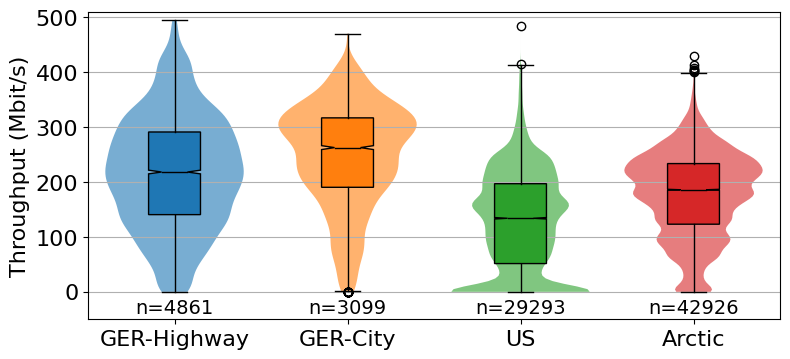

In [2]:
"""Fig. 3a - Throughput Boxplots download"""
import matplotlib.pyplot as plt

boxplot_data = [autobahn_data["download"], SotR_iperf_data["download"], conext_udp_data_dl["throughput"], arc_data["sl_rx_tput__eth1"]]
positions = [1,2,3,4]
# Plotting
fig, ax = plt.subplots(figsize=(8, 3.7))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed

# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)

#cmap = plt.get_cmap("tab10")
#colors = [cmap(0), cmap(1), cmap(2), cmap(3)]
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')

# Annotate number of samples above each box plot
for i, data in enumerate(boxplot_data):
    sample_size = len(data)
    ax.text(positions[i], -46, f'n={sample_size}', ha='center', va='bottom', fontsize=14, color='black')

# Create custom legend
legend_labels = ['GER-Highway', 'GER-City', 'US', 'Arctic']
legend_colors = [cmap(i) for i in range(4)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

#ax.text(1, 8.5, f'n={star_standard_down.shape[0]}', horizontalalignment='center')
#ax.text(2, 8.5, f'n={star_mobile_down.shape[0]}', horizontalalignment='center')
#ax.text(3, 8.5, f'n={star_fhp_down.shape[0]}', horizontalalignment='center')

ax.set_xticklabels(legend_labels)

#ax.set_yscale("log")
y_ticks = [0, 100, 200, 300, 400, 500]
fzsize = 16
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.yticks(y_ticks)
plt.ylim(-50, 510)
plt.grid(axis='y')
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)

plt.tight_layout()
plt.savefig("Plots/Fig3a.pdf", format="pdf")

In [3]:
print("Download Stats")
print("----------GER-Highway:----------")
print(autobahn_data["download"].describe())
print("----------GER-City:----------")
print(SotR_iperf_data["download"].describe())
print("----------US:----------")
print(conext_udp_data_dl["throughput"].describe())
print("----------Arctic:----------")
print(arc_data["sl_rx_tput__eth1"].describe())

Download Stats
----------GER-Highway:----------
count    4861.000000
mean      217.657938
std       104.253679
min         0.000000
25%       140.656993
50%       218.298475
75%       291.234212
max       495.145877
Name: download, dtype: float64
----------GER-City:----------
count    3099.000000
mean      246.798066
std        94.404126
min         0.000000
25%       190.459000
50%       262.767000
75%       316.963000
max       470.663000
Name: download, dtype: float64
----------US:----------
count    29293.000000
mean       127.916522
std         90.218378
min          0.000000
25%         51.500000
50%        134.000000
75%        197.000000
max        484.000000
Name: throughput, dtype: float64
----------Arctic:----------
count    42926.000000
mean       176.766697
std         77.181055
min          0.000000
25%        123.230250
50%        185.978500
75%        233.681000
max        430.429000
Name: sl_rx_tput__eth1, dtype: float64


In [4]:
print("Upload Stats")
print("----------GER-Highway:----------")
print(autobahn_data["upload"].describe())
print("----------GER-City:----------")
print(SotR_iperf_data["upload"].describe())
print("----------US:----------")
print(conext_udp_data_ul["throughput"].describe())

Upload Stats
----------GER-Highway:----------
count    4861.000000
mean       15.620370
std        10.183006
min         0.000000
25%         8.108216
50%        14.943105
75%        21.579719
max        64.175360
Name: upload, dtype: float64
----------GER-City:----------
count    3099.000000
mean       16.517577
std         8.616113
min         0.000000
25%        10.541000
50%        15.442000
75%        21.592500
max        57.259000
Name: upload, dtype: float64
----------US:----------
count    5224.000000
mean       21.476033
std        14.370003
min         0.000162
25%         9.400000
50%        18.000000
75%        27.790000
max        79.200000
Name: throughput, dtype: float64


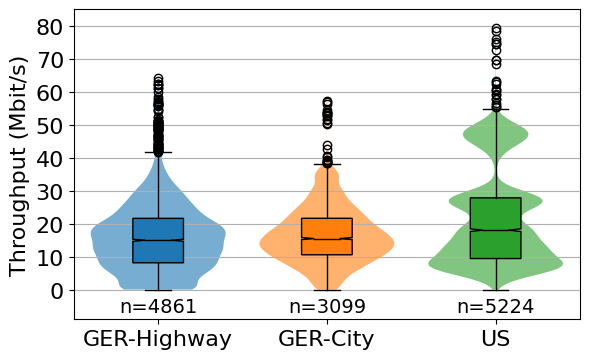

In [5]:
"""Fig 3b - Throughput Boxplots upload"""
import matplotlib.pyplot as plt

boxplot_data = [autobahn_data["upload"], SotR_iperf_data["upload"], conext_udp_data_ul["throughput"]]
positions = [1,2,3]
# Plotting
fig, ax = plt.subplots(figsize=(6, 3.7))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed

# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)
cmap = plt.get_cmap("tab10")
colors = [cmap(0), cmap(1), cmap(2)]
# Set colors for each box plot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
# Set median line colors to black
for median in box['medians']:
    median.set(color='black')

# Annotate number of samples above each box plot
for i, data in enumerate(boxplot_data):
    sample_size = len(data)
    ax.text(positions[i], -8, f'n={sample_size}', ha='center', va='bottom', fontsize=14, color='black')

# Create custom legend
legend_labels = ['GER-Highway', 'GER-City', 'US']
legend_colors = [cmap(i) for i in range(4)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]

#ax.text(1, 8.5, f'n={star_standard_down.shape[0]}', horizontalalignment='center')
#ax.text(2, 8.5, f'n={star_mobile_down.shape[0]}', horizontalalignment='center')
#ax.text(3, 8.5, f'n={star_fhp_down.shape[0]}', horizontalalignment='center')

ax.set_xticklabels(legend_labels)

#ax.set_yscale("log")
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80]
fzsize = 16
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.yticks(y_ticks)
plt.ylim(-9, 85)
plt.grid(axis='y')
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)

plt.tight_layout()
plt.savefig("Plots/Fig3b.pdf", format="pdf")

In [6]:
"""CIs of medians"""
import numpy as np
import pandas as pd

def bootstrap_median_ci(data, num_bootstraps=1000, confidence_level=95):
    medians = []
    n = len(data)
    
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    alpha = 100 - confidence_level
    lower_percentile = alpha / 2
    upper_percentile = 100 - lower_percentile
    
    lower_bound = np.percentile(medians, lower_percentile)
    upper_bound = np.percentile(medians, upper_percentile)
    
    return lower_bound, upper_bound

print(bootstrap_median_ci(autobahn_data["upload"]))
print(bootstrap_median_ci(SotR_iperf_data["upload"]))
print(bootstrap_median_ci(conext_udp_data_ul["throughput"]))


(14.537563339874433, 15.324644391361604)
(15.128, 15.825)
(17.679624999999994, 18.220000000000006)


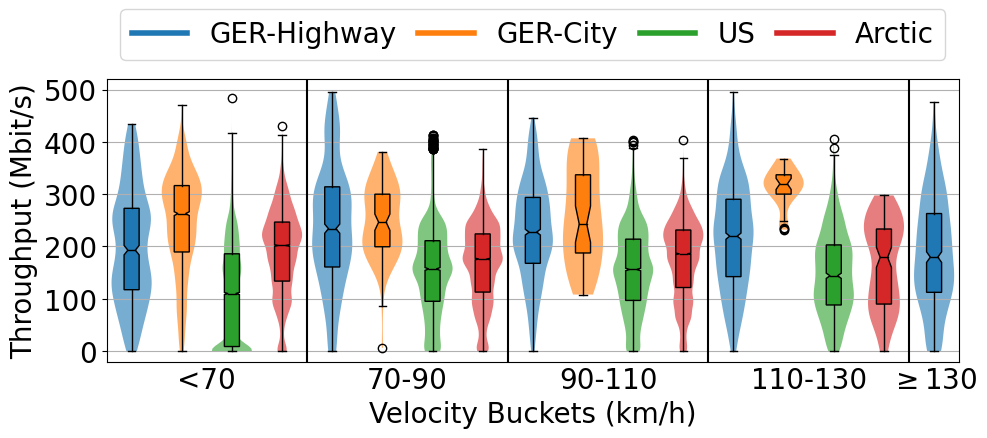

In [7]:
"""Fig. 5a"""

import matplotlib.pyplot as plt

"""Speed Analysis Custom Buckets"""
autobahn_70 = autobahn_data[autobahn_data["Speed(km/h)"] < 70]
autobahn_80 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 70) & (autobahn_data["Speed(km/h)"] < 90)]
autobahn_100 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 90) & (autobahn_data["Speed(km/h)"] < 110)]
autobahn_120 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 110) & (autobahn_data["Speed(km/h)"] < 130)]
autobahn_140 = autobahn_data[autobahn_data["Speed(km/h)"] >= 130]

arc_70 = arc_data[arc_data["velocity_kmh"] < 70]
arc_80 = arc_data[(arc_data["velocity_kmh"] >= 70) & (arc_data["velocity_kmh"] < 90)]
arc_100 = arc_data[(arc_data["velocity_kmh"] >= 90) & (arc_data["velocity_kmh"] < 110)]
arc_120 = arc_data[(arc_data["velocity_kmh"] >= 110) & (arc_data["velocity_kmh"] < 130)]
#arc_140 = arc_data[arc_data["velocity_kmh"] >= 130]  # no data!

conext_70 = conext_udp_data_dl[conext_udp_data_dl["speed_kmh"] < 70]
conext_80 = conext_udp_data_dl[(conext_udp_data_dl["speed_kmh"] >= 70) & (conext_udp_data_dl["speed_kmh"] < 90)]
conext_100 = conext_udp_data_dl[(conext_udp_data_dl["speed_kmh"] >= 90) & (conext_udp_data_dl["speed_kmh"] < 110)]
conext_120 = conext_udp_data_dl[(conext_udp_data_dl["speed_kmh"] >= 110) & (conext_udp_data_dl["speed_kmh"] < 130)]
# conext_140 = conext_udp_data_dl[conext_udp_data_dl["speed_kmh"] >= 130]  # no data!

sotr_70 = SotR_iperf_data[SotR_iperf_data["average_speed"] < 70]
sotr_80 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 70) & (SotR_iperf_data["average_speed"] < 90)]
sotr_100 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 90) & (SotR_iperf_data["average_speed"] < 110)]
sotr_120 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 110) & (SotR_iperf_data["average_speed"] < 130)]
# sotr_140 = SotR_iperf_data[SotR_iperf_data["average_speed"] >= 130]  # no data!
SotR_iperf_data["average_speed"]


boxplot_data = [autobahn_70["download"], sotr_70["download"], conext_70["throughput"], arc_70["sl_rx_tput__eth1"],
               autobahn_80["download"], sotr_80["download"], conext_80["throughput"], arc_80["sl_rx_tput__eth1"],
               autobahn_100["download"], sotr_100["download"], conext_100["throughput"], arc_100["sl_rx_tput__eth1"],
               autobahn_120["download"], sotr_120["download"], conext_120["throughput"], arc_120["sl_rx_tput__eth1"],
               autobahn_140["download"]]

positions = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
# Plotting
fig, ax = plt.subplots(figsize=(10, 4.5))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3), cmap(0), cmap(1), cmap(2), cmap(3), cmap(0)]
#violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed


# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
#Set median line colors to black
for median in box['medians']:
    median.set(color='black')

ax.vlines([4.5,8.5,12.5,16.5], -20, 520, colors="black")

#ax.set_yscale("log")
y_ticks = [0, 100, 200, 300, 400, 500]
x_ticks = [2.5, 6.5, 10.5, 14.5, 17]
fzsize = 20
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.yticks(y_ticks)
plt.xticks(x_ticks, rotation=0)
ax.tick_params(axis='x', which='both', length=0)


legend_labels = ['<70', '70-90', '90-110', '110-130', '$\geq$130']
ax.set_xticklabels(legend_labels)

# Create custom legend

# Create custom legend
legend_labels = ['GER-Highway', 'GER-City', 'US', 'Arctic']
legend_colors = [cmap(i) for i in range(4)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=fzsize, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=4, mode='expand')


#ax.text(1, 8.5, f'n={star_standard_down.shape[0]}', horizontalalignment='center')
#ax.text(2, 8.5, f'n={star_mobile_down.shape[0]}', horizontalalignment='center')
#ax.text(3, 8.5, f'n={star_fhp_down.shape[0]}', horizontalalignment='center')
plt.grid(axis='y')
plt.ylim(-20, 520)
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
ax.set_xlabel('Velocity Buckets (km/h)', size=fzsize)

plt.tight_layout()
plt.savefig("Plots/Fig5a.pdf", format="pdf")

In [8]:
"""CIs of medians"""
import numpy as np
import pandas as pd

def bootstrap_median_ci(data, num_bootstraps=1000, confidence_level=95):
    medians = []
    n = len(data)
    
    for _ in range(num_bootstraps):
        sample = np.random.choice(data, size=n, replace=True)
        medians.append(np.median(sample))
    
    alpha = 100 - confidence_level
    lower_percentile = alpha / 2
    upper_percentile = 100 - lower_percentile
    
    lower_bound = np.percentile(medians, lower_percentile)
    upper_bound = np.percentile(medians, upper_percentile)
    
    return lower_bound, upper_bound

print(bootstrap_median_ci(autobahn_70["download"]))
print(bootstrap_median_ci(autobahn_80["download"]))
print(bootstrap_median_ci(autobahn_100["download"]))
print(bootstrap_median_ci(autobahn_120["download"]))
print(bootstrap_median_ci(autobahn_140["download"]))

(180.02019567267695, 210.54551100938912)
(221.8553266360994, 250.3337464476976)
(220.5466717690937, 232.5318499622341)
(213.01627148612096, 225.23178206901815)
(166.71876638437683, 191.58347749114705)


In [9]:
"""Speed Analysis Custom Buckets"""
autobahn_70 = autobahn_data[autobahn_data["Speed(km/h)"] < 70]
autobahn_80 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 70) & (autobahn_data["Speed(km/h)"] < 90)]
autobahn_100 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 90) & (autobahn_data["Speed(km/h)"] < 110)]
autobahn_120 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 110) & (autobahn_data["Speed(km/h)"] < 130)]
autobahn_140 = autobahn_data[autobahn_data["Speed(km/h)"] >= 130]

print("----- <70 kmh -----")
print(autobahn_70["download"].describe())
print("----- 70-90 kmh -----")
print(autobahn_80["download"].describe())
print("----- 90-110 kmh -----")
print(autobahn_100["download"].describe())
print("----- 110-130 kmh -----")
print(autobahn_120["download"].describe())
print("----- >=130 kmh -----")
print(autobahn_140["download"].describe())

----- <70 kmh -----
count    722.000000
mean     199.831748
std      108.376283
min        0.000000
25%      117.362504
50%      192.893193
75%      272.953472
max      433.722180
Name: download, dtype: float64
----- 70-90 kmh -----
count    754.000000
mean     239.786673
std      115.828350
min        0.000000
25%      160.809808
50%      234.031441
75%      314.012694
max      495.145877
Name: download, dtype: float64
----- 90-110 kmh -----
count    1309.000000
mean      227.991140
std        93.232776
min         0.000000
25%       167.794080
50%       227.335783
75%       293.757913
max       446.368507
Name: download, dtype: float64
----- 110-130 kmh -----
count    1535.000000
mean      217.362701
std       101.202915
min         0.000000
25%       142.365723
50%       219.713728
75%       290.251157
max       495.137684
Name: download, dtype: float64
----- >=130 kmh -----
count    541.000000
mean     186.442544
std      104.572219
min        0.000000
25%      112.350189
50%      

In [10]:
"""Speed Analysis Custom Buckets"""
autobahn_70 = autobahn_data[autobahn_data["Speed(km/h)"] < 70]
autobahn_80 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 70) & (autobahn_data["Speed(km/h)"] < 90)]
autobahn_100 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 90) & (autobahn_data["Speed(km/h)"] < 110)]
autobahn_120 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 110) & (autobahn_data["Speed(km/h)"] < 130)]
autobahn_140 = autobahn_data[autobahn_data["Speed(km/h)"] >= 130]

print("----- <70 kmh -----")
print(autobahn_70["upload"].describe())
print("----- 70-90 kmh -----")
print(autobahn_80["upload"].describe())
print("----- 90-110 kmh -----")
print(autobahn_100["upload"].describe())
print("----- 110-130 kmh -----")
print(autobahn_120["upload"].describe())
print("----- >=130 kmh -----")
print(autobahn_140["upload"].describe())

----- <70 kmh -----
count    722.000000
mean      14.081978
std        9.846772
min        0.000000
25%        5.596436
50%       13.240532
75%       21.901928
max       41.832208
Name: upload, dtype: float64
----- 70-90 kmh -----
count    754.000000
mean      16.251471
std       10.693703
min        0.000000
25%        7.046231
50%       16.072599
75%       25.605498
max       55.974392
Name: upload, dtype: float64
----- 90-110 kmh -----
count    1309.000000
mean       16.749172
std         9.727790
min         0.000000
25%        10.136000
50%        16.334355
75%        21.154372
max        57.144730
Name: upload, dtype: float64
----- 110-130 kmh -----
count    1535.000000
mean       15.171712
std         9.855618
min         0.000000
25%         7.662709
50%        14.619373
75%        21.251103
max        51.201384
Name: upload, dtype: float64
----- >=130 kmh -----
count    541.000000
mean      15.335636
std       11.476702
min        0.000000
25%        8.324709
50%       12.9163

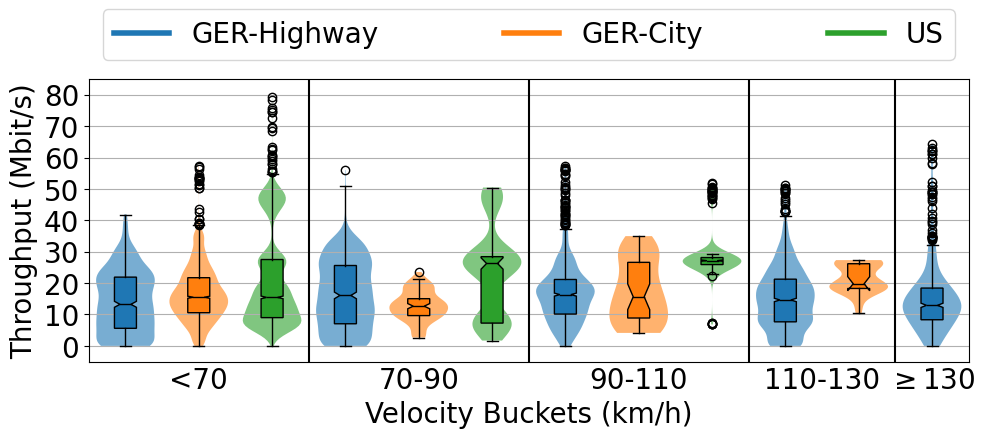

In [11]:
"""Fig. 5b"""
import matplotlib.pyplot as plt

"""Speed Analysis Custom Buckets"""
autobahn_70 = autobahn_data[autobahn_data["Speed(km/h)"] < 70]
autobahn_80 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 70) & (autobahn_data["Speed(km/h)"] < 90)]
autobahn_100 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 90) & (autobahn_data["Speed(km/h)"] < 110)]
autobahn_120 = autobahn_data[(autobahn_data["Speed(km/h)"] >= 110) & (autobahn_data["Speed(km/h)"] < 130)]
autobahn_140 = autobahn_data[autobahn_data["Speed(km/h)"] >= 130]


conext_70 = conext_udp_data_ul[conext_udp_data_ul["speed_kmh"] < 70]
conext_80 = conext_udp_data_ul[(conext_udp_data_ul["speed_kmh"] >= 70) & (conext_udp_data_ul["speed_kmh"] < 90)]
conext_100 = conext_udp_data_ul[(conext_udp_data_ul["speed_kmh"] >= 90) & (conext_udp_data_ul["speed_kmh"] < 110)]
# conext_120 = conext_udp_data_ul[(conext_udp_data_ul["speed_kmh"] >= 110) & (conext_udp_data_ul["speed_kmh"] < 130)]  # no data!
# conext_140 = conext_udp_data_dl[conext_udp_data_dl["speed_kmh"] >= 130]  # no data!

sotr_70 = SotR_iperf_data[SotR_iperf_data["average_speed"] < 70]
sotr_80 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 70) & (SotR_iperf_data["average_speed"] < 90)]
sotr_100 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 90) & (SotR_iperf_data["average_speed"] < 110)]
sotr_120 = SotR_iperf_data[(SotR_iperf_data["average_speed"] >= 110) & (SotR_iperf_data["average_speed"] < 130)]
# sotr_140 = SotR_iperf_data[SotR_iperf_data["average_speed"] >= 130]  # no data!
# SotR_iperf_data["average_speed"]


boxplot_data = [autobahn_70["upload"], sotr_70["upload"], conext_70["throughput"],
               autobahn_80["upload"], sotr_80["upload"], conext_80["throughput"],
               autobahn_100["upload"], sotr_100["upload"], conext_100["throughput"],
               autobahn_120["upload"], sotr_120["upload"],
               autobahn_140["upload"]]

positions = [1,2,3,4,5,6,7,8,9,10,11,12]
# Plotting
fig, ax = plt.subplots(figsize=(10, 4.5))

# Create the Violin Plots
violin_parts = ax.violinplot(boxplot_data, positions=positions, widths=0.8, showmeans=False, showmedians=False, showextrema=False)

# Set the colors for the violin plot
cmap = plt.get_cmap("tab10")
violin_colors = [cmap(0), cmap(1), cmap(2), cmap(0), cmap(1), cmap(2), cmap(0), cmap(1), cmap(2), cmap(0), cmap(1), cmap(0)]
#violin_colors = [cmap(i) for i in range(len(boxplot_data))]
for pc, color in zip(violin_parts['bodies'], violin_colors):
    pc.set_facecolor(color)
#    pc.set_edgecolor('black')
    pc.set_alpha(0.6)  # Adjust transparency if needed

# Create the boxplot
box = ax.boxplot(boxplot_data, positions=positions, widths=0.3, notch=True, patch_artist=True)
#cmap = plt.get_cmap("tab10")
# Set colors for each box plot
for patch, color in zip(box['boxes'], violin_colors):
    patch.set_facecolor(color)
#Set median line colors to black
for median in box['medians']:
    median.set(color='black')

ax.vlines([3.5,6.5,9.5, 11.5], -5, 85, colors="black")

#ax.set_yscale("log")
y_ticks = [0, 10, 20, 30, 40, 50, 60, 70, 80]
x_ticks = [2, 5, 8, 10.5, 12]
fzsize = 20
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)
plt.yticks(y_ticks)
plt.xticks(x_ticks, rotation=0)
ax.tick_params(axis='x', which='both', length=0)

legend_labels = ['<70', '70-90', '90-110', '110-130', '$\geq$130']
ax.set_xticklabels(legend_labels)

# Create custom legend
legend_labels = ['GER-Highway', 'GER-City', 'US']
legend_colors = [cmap(i) for i in range(3)]
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in legend_colors]
ax.legend(handles, legend_labels, fontsize=fzsize, loc='lower left', bbox_to_anchor=(0, 1.02, 1, 0.2), ncol=4, mode='expand')


#ax.text(1, 8.5, f'n={star_standard_down.shape[0]}', horizontalalignment='center')
#ax.text(2, 8.5, f'n={star_mobile_down.shape[0]}', horizontalalignment='center')
#ax.text(3, 8.5, f'n={star_fhp_down.shape[0]}', horizontalalignment='center')
plt.grid(axis='y')
plt.ylim(-5, 85)
ax.set_ylabel('Throughput (Mbit/s)', size=fzsize)
ax.set_xlabel('Velocity Buckets (km/h)', size=fzsize)

plt.tight_layout()
plt.savefig("Plots/Fig5b.pdf", format="pdf")

In [12]:
print("----- <70 kmh -----")
print(sotr_70.describe())
print("----- 70-90 kmh -----")
print(sotr_80.describe())
print("----- 90-110 kmh -----")
print(sotr_100.describe())
print("----- 110-130 kmh -----")
print(sotr_120.describe())
#print("----- >=130 kmh -----")
#print(sotr_140["download"].describe())

----- <70 kmh -----
          download       upload  priority  average_speed  download_mbps  \
count  2920.000000  2920.000000    2920.0    2920.000000    2920.000000   
mean    245.831577    16.588644       0.0      26.534405     245.831577   
std      95.399894     8.685719       0.0      14.746785      95.399894   
min       0.000000     0.000000       0.0       1.507236       0.000000   
25%     189.491750    10.564750       0.0      14.983699     189.491750   
50%     262.761000    15.493500       0.0      25.935704     262.761000   
75%     316.372250    21.721250       0.0      36.680776     316.372250   
max     470.663000    57.259000       0.0      69.852246     470.663000   

       upload_mbps  
count  2920.000000  
mean     16.588644  
std       8.685719  
min       0.000000  
25%      10.564750  
50%      15.493500  
75%      21.721250  
max      57.259000  
----- 70-90 kmh -----
         download      upload  priority  average_speed  download_mbps  \
count  103.000000  1